In [ ]:
# 1) Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Load Dataset
df = pd.read_csv("house_data.csv")
print("Dataset shape:", df.shape)
print(df.head())

# 3) Inspect Columns
print(df.info())
print(df.describe())

# 4) Handle Missing Values (Simple)
df = df.dropna()  # or use imputation if needed

# 5) Feature Selection (example)
# These are typical house price predictors:
features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'waterfront', 'view', 'condition',
    'sqft_basement', 'yr_built'
]

target = "price"

# Check if the above columns exist
for col in features + [target]:
    if col not in df.columns:
        print(f"Column missing: {col}")

X = df[features]
y = df[target]

# 6) Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7) Feature Scaling (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8) Build Regression Model
rf_model = RandomForestRegressor(
    n_estimators=150, 
    random_state=42
)

# Train
rf_model.fit(X_train_scaled, y_train)

# 9) Predict
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# 10) Evaluate
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("TRAIN MSE:", mse_train)
print("TEST MSE:", mse_test)
print("TRAIN R2 :", r2_train)
print("TEST R2 :", r2_test)

# 11) Feature Importance
feat_importance = rf_model.feature_importances_
feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": feat_importance
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Feature Importance")
plt.show()


Dataset Name: House Price Prediction Dataset

https://drive.google.com/file/d/1aNw7f2sO16PlhqxdOeFBqwWDjjE1XrhT/view?usp=sharing

Business Scenario

A real estate analytics company helps customers estimate the market value of residential properties.

Property prices do not always increase smoothly:

Prices jump based on location

Amenities create sudden price differences

Market behaviour is noisy and inconsistent

The company wants a reliable pricing system that can:

Handle non-linear relationships

Work well with noisy real-world data

Provide stable predictions for unseen properties

You are hired as a Data Analyst to build this pricing solution.

1.Load the dataset and examine the available property attributes.

2.Identify input features that may influence house prices (e.g., size, bedrooms, bathrooms, location-related fields).

3.Build a regression model that predicts house price based on the selected features.

4.Train the model using historical property data.Predict prices for unseen property records.

5.Evaluate the model performance using:

-Mean Squared Error (MSE)

-R² score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('house_data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df = df.dropna() 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'waterfront', 'view', 'condition',
    'sqft_basement', 'yr_built'
]
target = "price"


for col in features + [target]:
    if col not in df.columns:
        print(f"Column missing: {col}")

In [13]:
print(df.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [15]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)


In [24]:
#Build Regression Model
rf_model = RandomForestRegressor(
    n_estimators=200, 
    random_state=42
)
# Train
rf_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("TRAIN MSE:", mse_train)
print("TEST MSE:", mse_test)
print("TRAIN R2 :", r2_train)
print("TEST R2 :", r2_test)

TRAIN MSE: 9557231279.386267
TEST MSE: 992199358043.444
TRAIN R2 : 0.9327362418745591
TEST R2 : 0.027108968240405096


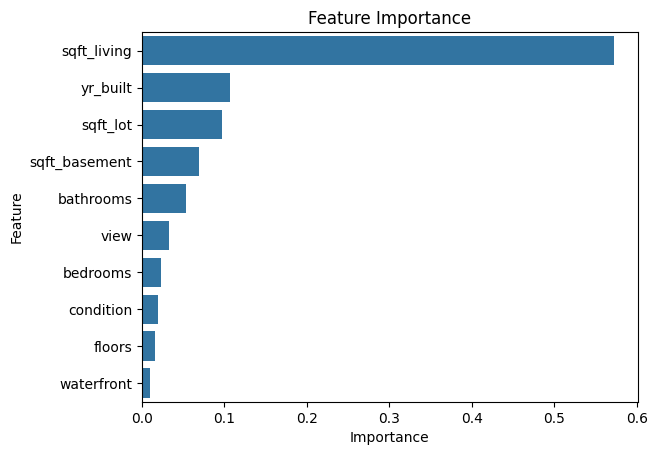

In [23]:
# Feature importance
feat_importance = rf_model.feature_importances_
feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": feat_importance
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Feature Importance")
plt.show()

6. Analyze the prediction behavior
7. Build an alternative regression model that combines predictions from multiple rule-based models.
8. Compare the two models based on:
Does the model produce smooth or step-wise predictions?
Does it react strongly to small changes in input?
Stability of predictions
Sensitivity to noise
Performance on test data
 